In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
import requests
import io

In [2]:
url = "https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv"
stream = requests.get(url).content
df = pd.read_csv(io.StringIO(stream.decode('utf-8')), index_col=0)
df = df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
-Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [17]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [18]:
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [19]:
enet_model.intercept_


-6.465955602112331

In [20]:
enet_model.predict(X_train)[:10]


array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [21]:
enet_model.predict(X_test)[:10]


array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [22]:
y_pred = enet_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181246

In [23]:
r2_score(y_test,y_pred)


0.41070222469326867

In [24]:
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)

# If we don't give the lambdas, what's the alpha?

enet_cv_model.alpha_

5230.7647364798695

In [25]:
enet_cv_model.intercept_


-38.5194055839429

In [26]:
enet_cv_model.coef_


array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [28]:
# Let's create the final model according to optimum alpha.

enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

# Let's now calculate the error for the test set using this final model.

y_pred = enet_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795

In [29]:
enet_tuned.score(X_test, X_train)

ValueError: Found input variables with inconsistent numbers of samples: [197, 66]

In [3]:
import neurokit2 as nk


In [6]:
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)


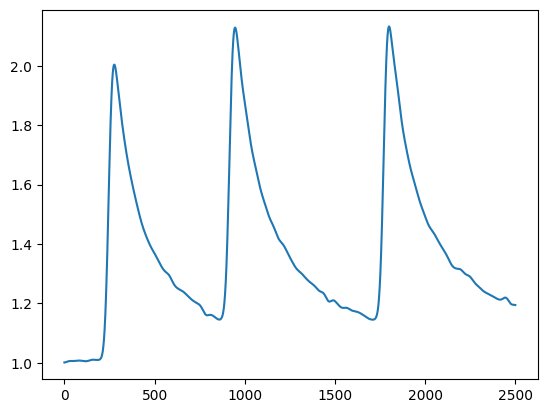

In [7]:
plt.plot(eda_signal)

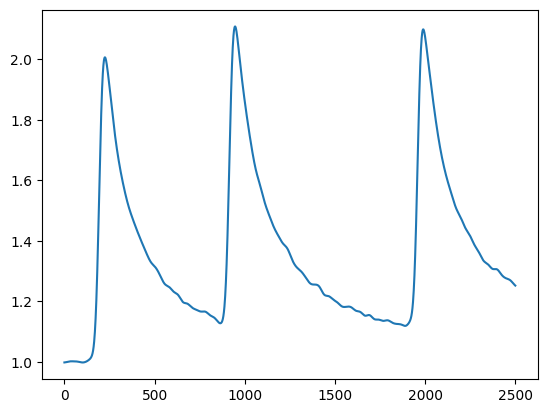

In [8]:
plt.plot(nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01))

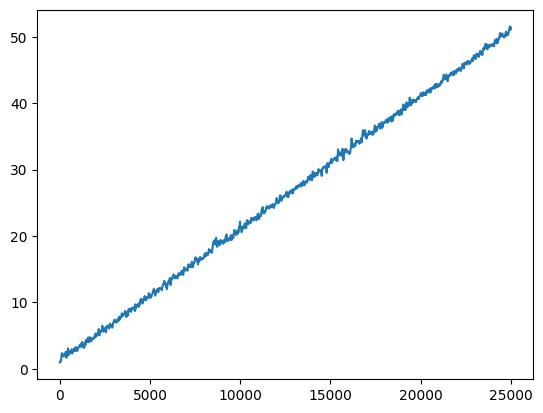

In [14]:
plt.plot(nk.eda_simulate(duration=100, sampling_rate=250, scr_number=3, drift=0.5))

In [65]:
def compute_enet( x_train, y_train, alpha = 1.0, l1_ratio = 0.5) -> ElasticNet:
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(x_train, y_train)

def enet_loop(x, y, alpha = 1.0, l1_ratio = 0.5, batch_size = 300, incr = 30):
    y_pred = pd.DataFrame([])
    counter = batch_size
    while len(x) > counter:
        try:
            x_train = x[counter-batch_size:counter]
            y_train = y[counter-batch_size:counter]
            x_test = x[counter:counter+incr].reshape(-1, 1)
            enet = compute_enet(x_train, y_train, alpha, l1_ratio)
            target_y_pred = enet.predict(x_test)
            # y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
            y_pred = pd.concat([y_pred , pd.DataFrame(target_y_pred)], ignore_index=True)
            counter += incr
        except Exception as e:
            print(e)
            counter += incr
    return y_pred

In [64]:
df1 = pd.DataFrame(compute_enet(np.array(list(range(1, 1000))).reshape(-1, 1), np.array(list(range(1, 1000))).reshape(-1, 1)).predict( np.array(list(range(1000, 1020))).reshape(-1, 1)))

df2 = pd.DataFrame(compute_enet(np.array(list(range(1, 1000))).reshape(-1, 1), np.array(list(range(1, 1000))).reshape(-1, 1)).predict( np.array(list(range(1000, 1020))).reshape(-1, 1)))

pd.concat([df1 , df2], ignore_index=True)

,0
0,999.993988
1,1000.993976
2,1001.993964
3,1002.993952
4,1003.993940
5,1004.993928
6,1005.993916
7,1006.993904
8,1007.993892
9,1008.993880


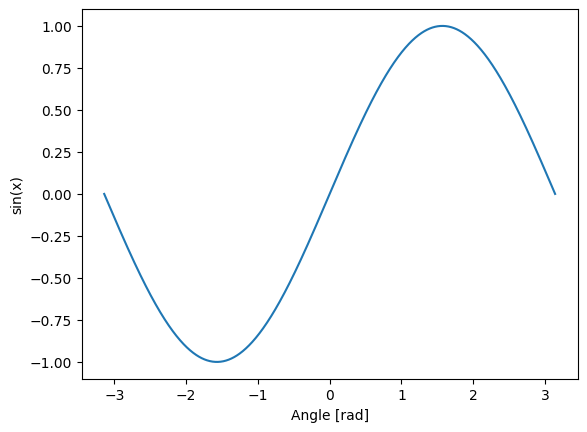

In [2]:
import  numpy as np
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [28]:
def compute_enet( x_train, y_train, alpha = 1.0, l1_ratio = 0.5) -> ElasticNet:
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(x_train, y_train)

def enet_loop(x, y, alpha = 1.0, l1_ratio = 0.5, batch_size = 50, incr = 10):
    y_pred = pd.DataFrame([])
    counter = batch_size
    while len(x) > counter:
        print("hoge")
        try:
            x_train = x[counter-batch_size:counter]
            y_train = y[counter-batch_size:counter]
            x_test = x[counter:counter+incr].reshape(-1, 1)
            enet = compute_enet(x_train, y_train, alpha, l1_ratio)
            target_y_pred = enet.predict(x_test)
            y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
            counter += incr
        except Exception as e:
            print(e)
            counter += incr
    return y_pred

In [29]:
x

array([-3.14159265, -3.13530318, -3.1290137 , -3.12272423, -3.11643475,
       -3.11014528, -3.1038558 , -3.09756633, -3.09127686, -3.08498738,
       -3.07869791, -3.07240843, -3.06611896, -3.05982948, -3.05354001,
       -3.04725053, -3.04096106, -3.03467158, -3.02838211, -3.02209263,
       -3.01580316, -3.00951368, -3.00322421, -2.99693473, -2.99064526,
       -2.98435578, -2.97806631, -2.97177683, -2.96548736, -2.95919788,
       -2.95290841, -2.94661894, -2.94032946, -2.93403999, -2.92775051,
       -2.92146104, -2.91517156, -2.90888209, -2.90259261, -2.89630314,
       -2.89001366, -2.88372419, -2.87743471, -2.87114524, -2.86485576,
       -2.85856629, -2.85227681, -2.84598734, -2.83969786, -2.83340839,
       -2.82711891, -2.82082944, -2.81453996, -2.80825049, -2.80196102,
       -2.79567154, -2.78938207, -2.78309259, -2.77680312, -2.77051364,
       -2.76422417, -2.75793469, -2.75164522, -2.74535574, -2.73906627,
       -2.73277679, -2.72648732, -2.72019784, -2.71390837, -2.70

In [30]:
np.sin(x)

array([-1.22464680e-16, -6.28943332e-03, -1.25786178e-02, -1.88673048e-02,
       -2.51552454e-02, -3.14421909e-02, -3.77278927e-02, -4.40121020e-02,
       -5.02945704e-02, -5.65750492e-02, -6.28532900e-02, -6.91290446e-02,
       -7.54020646e-02, -8.16721019e-02, -8.79389084e-02, -9.42022363e-02,
       -1.00461838e-01, -1.06717465e-01, -1.12968871e-01, -1.19215809e-01,
       -1.25458030e-01, -1.31695289e-01, -1.37927338e-01, -1.44153931e-01,
       -1.50374822e-01, -1.56589764e-01, -1.62798512e-01, -1.69000820e-01,
       -1.75196443e-01, -1.81385136e-01, -1.87566653e-01, -1.93740751e-01,
       -1.99907185e-01, -2.06065711e-01, -2.12216086e-01, -2.18358066e-01,
       -2.24491409e-01, -2.30615871e-01, -2.36731210e-01, -2.42837185e-01,
       -2.48933554e-01, -2.55020076e-01, -2.61096510e-01, -2.67162616e-01,
       -2.73218154e-01, -2.79262883e-01, -2.85296566e-01, -2.91318963e-01,
       -2.97329837e-01, -3.03328948e-01, -3.09316061e-01, -3.15290939e-01,
       -3.21253344e-01, -

In [69]:
x = np.linspace(-np.pi, np.pi, 300)
pred_sin = enet_loop(np.array(range(0, len(x))).reshape(-1, 1), np.array(np.sin(x)).reshape(-1, 1))

hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge
hoge


/tmp/ipykernel_17200/3750866228.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/tmp/ipykernel_17200/3750866228.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/tmp/ipykernel_17200/3750866228.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/tmp/ipykernel_17200/3750866228.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/tmp/ipykernel_17200

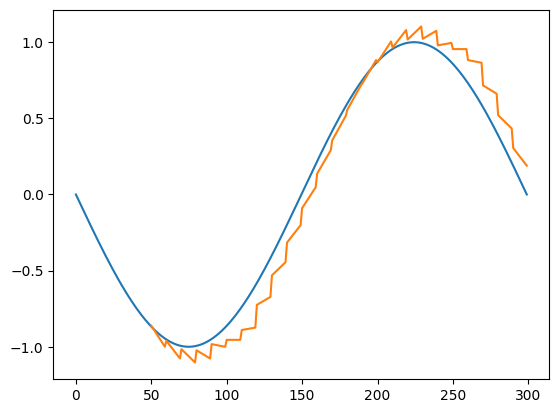

In [70]:
plt.plot(range(0, len(x)), np.sin(x))
plt.plot(range(50, len(x)), pred_sin)

In [54]:
sin_df = pd.DataFrame(np.sin(x), x)

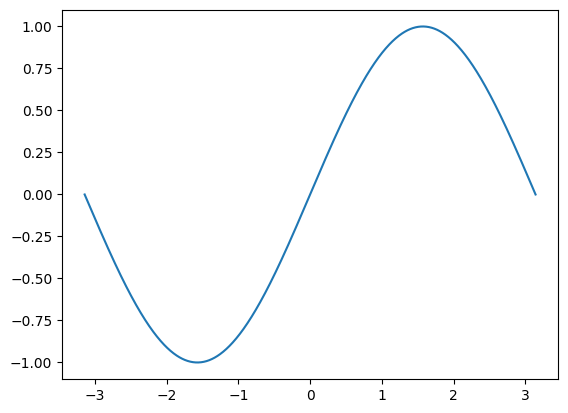

In [55]:
plt.plot(sin_df)

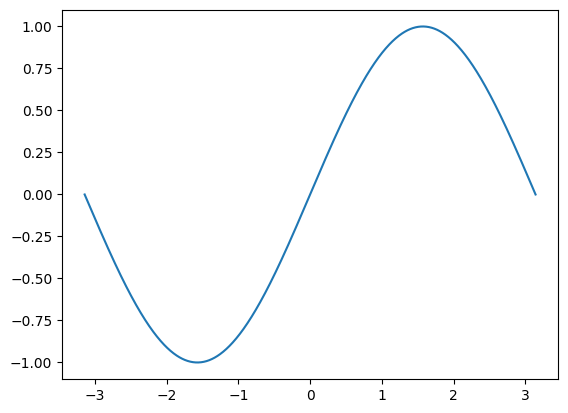

In [56]:
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x, np.sin(x))


In [57]:
x

array([-3.14159265, -3.13530318, -3.1290137 , -3.12272423, -3.11643475,
       -3.11014528, -3.1038558 , -3.09756633, -3.09127686, -3.08498738,
       -3.07869791, -3.07240843, -3.06611896, -3.05982948, -3.05354001,
       -3.04725053, -3.04096106, -3.03467158, -3.02838211, -3.02209263,
       -3.01580316, -3.00951368, -3.00322421, -2.99693473, -2.99064526,
       -2.98435578, -2.97806631, -2.97177683, -2.96548736, -2.95919788,
       -2.95290841, -2.94661894, -2.94032946, -2.93403999, -2.92775051,
       -2.92146104, -2.91517156, -2.90888209, -2.90259261, -2.89630314,
       -2.89001366, -2.88372419, -2.87743471, -2.87114524, -2.86485576,
       -2.85856629, -2.85227681, -2.84598734, -2.83969786, -2.83340839,
       -2.82711891, -2.82082944, -2.81453996, -2.80825049, -2.80196102,
       -2.79567154, -2.78938207, -2.78309259, -2.77680312, -2.77051364,
       -2.76422417, -2.75793469, -2.75164522, -2.74535574, -2.73906627,
       -2.73277679, -2.72648732, -2.72019784, -2.71390837, -2.70

In [58]:
np.sin(x)

array([-1.22464680e-16, -6.28943332e-03, -1.25786178e-02, -1.88673048e-02,
       -2.51552454e-02, -3.14421909e-02, -3.77278927e-02, -4.40121020e-02,
       -5.02945704e-02, -5.65750492e-02, -6.28532900e-02, -6.91290446e-02,
       -7.54020646e-02, -8.16721019e-02, -8.79389084e-02, -9.42022363e-02,
       -1.00461838e-01, -1.06717465e-01, -1.12968871e-01, -1.19215809e-01,
       -1.25458030e-01, -1.31695289e-01, -1.37927338e-01, -1.44153931e-01,
       -1.50374822e-01, -1.56589764e-01, -1.62798512e-01, -1.69000820e-01,
       -1.75196443e-01, -1.81385136e-01, -1.87566653e-01, -1.93740751e-01,
       -1.99907185e-01, -2.06065711e-01, -2.12216086e-01, -2.18358066e-01,
       -2.24491409e-01, -2.30615871e-01, -2.36731210e-01, -2.42837185e-01,
       -2.48933554e-01, -2.55020076e-01, -2.61096510e-01, -2.67162616e-01,
       -2.73218154e-01, -2.79262883e-01, -2.85296566e-01, -2.91318963e-01,
       -2.97329837e-01, -3.03328948e-01, -3.09316061e-01, -3.15290939e-01,
       -3.21253344e-01, -

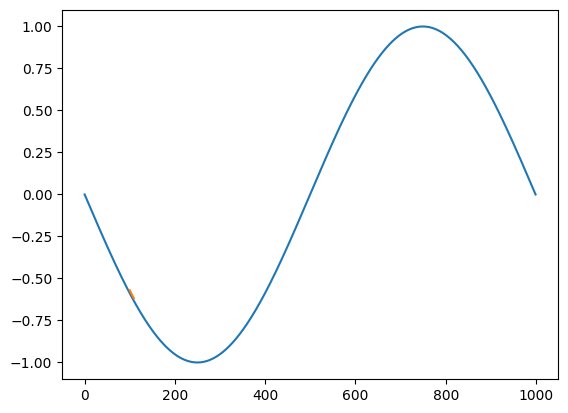

In [159]:
def compute_enet( x_train, y_train, alpha = 1.0, l1_ratio = 0.5) -> ElasticNet:
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(x_train, y_train)

def enet_loop(x, y, alpha = 1.0, l1_ratio = 0.5, batch_size = 300, incr = 30):
    y_pred = pd.DataFrame([])
    counter = batch_size
    while len(x) > counter:
        try:
            x_train = x[counter-batch_size:counter]
            y_train = y[counter-batch_size:counter]
            x_test = x[counter:counter+incr].reshape(-1, 1)
            enet = compute_enet(x_train, y_train, alpha, l1_ratio)
            target_y_pred = enet.predict(x_test)
            # y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
            y_pred = pd.concat([y_pred , pd.DataFrame(target_y_pred)], ignore_index=True)
            counter += incr
        except Exception as e:
            print(e)
            counter += incr
    return y_pred


x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)
x_train = pd.DataFrame(list(range(0, 100)))
y_train = pd.DataFrame(y[0:100])
x_test = np.array(list(range(100, 110))).reshape(-1, 1)
enet = compute_enet(x_train, y_train)
target_y_pred = enet.predict(x_test)
plt.plot(list(range(0, 1000)), np.sin(x))
plt.plot([x + 100 for x in range(0, 10)], target_y_pred)

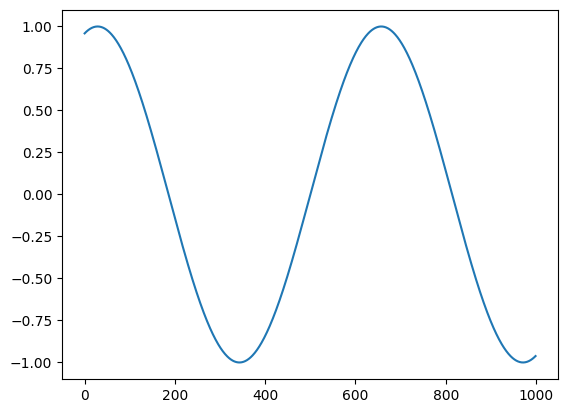

In [174]:
plt.plot(list(range(0, 1000)), np.sin(np.arange(-5, 5, 0.01)))

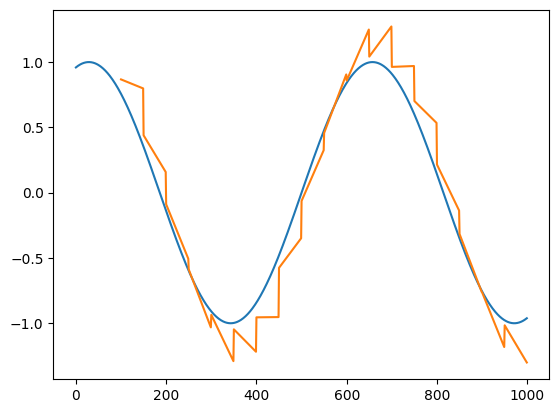

In [179]:
x = np.arange(-5, 5, 0.01)
y = np.sin(x)
t = list(range(0, 1000))
enet_result = enet_loop(np.array(t).reshape(-1, 1), np.array(y).reshape(-1, 1), batch_size = 100, incr = 50)
plt.plot(t, np.sin(x))
plt.plot(t[100:], enet_result)

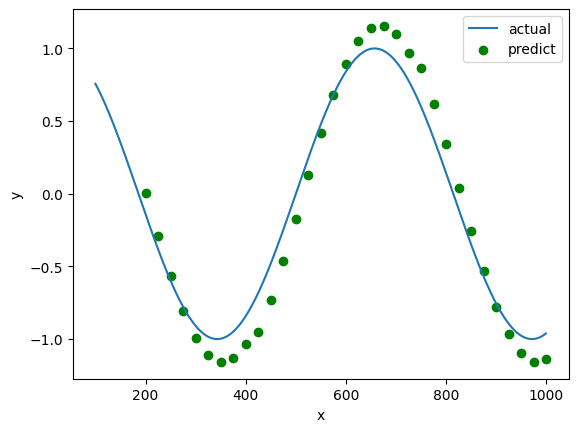

In [222]:
plt.xlabel(xlabel="x")
plt.ylabel(ylabel="y")
x = np.arange(-5, 5, 0.01)
y = np.sin(x)
t = list(range(0, 1000))
enet_result = enet_loop(np.array(t).reshape(-1, 1), np.array(y).reshape(-1, 1), batch_size = 100, incr = 25)
plt.plot(t[100:], np.sin(x)[100:], label='actual')
x_t = [__t1 + 100 for  __t1 in [_t1 * 25 for _t1 in list(range(0, 33))]]
y_t = [enet_result.to_numpy()[_t2-1] [0] for _t2 in x_t]
plt.scatter([xx + 100 for xx in x_t], y_t, c="green", edgecolors="green", label='predict')

plt.legend()
plt.savefig("enet_overeval.png")

In [215]:
x_t

[99,
 124,
 149,
 174,
 199,
 224,
 249,
 274,
 299,
 324,
 349,
 374,
 399,
 424,
 449,
 474,
 499,
 524,
 549,
 574,
 599,
 624,
 649,
 674,
 699,
 724,
 749,
 774,
 799,
 824,
 849,
 874,
 899]

In [196]:
x_t

[0,
 50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850]

In [192]:
enet_result

,0
0,0.867248
1,0.865841
2,0.864434
3,0.863026
4,0.861619
...,...
895,-1.277165
896,-1.282973
897,-1.288781
898,-1.294589


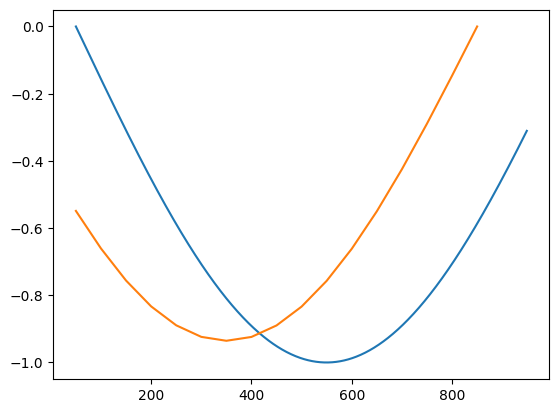

In [146]:
# # import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 2000)
# # plt.plot(x, np.sin(x))
# # plt.xlabel('Angle [rad]')
# # plt.ylabel('sin(x)')
# # plt.axis('tight')
# # plt.show()
#
enet_result = enet_loop(x.reshape(-1, 1), np.sin(x).reshape(-1, 1), batch_size=400, incr=50)
plt.plot(list(range(50, 950)), np.sin(x)[:900])
predict_x = [e*50 for  e in range(0,17)]
predict_y = [enet_result.to_numpy()[e][0] for e in predict_x]
plt.plot([e*50 for  e in range(1,18)], predict_y)


In [130]:
enet_result

,0
0,-0.301301
1,-0.301301
2,-0.301301
3,-0.301301
4,-0.301301
...,...
895,0.576142
896,0.576142
897,0.576142
898,0.576142


In [133]:
[e*50 for  e in range(0,18)]

[0,
 50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850]

In [49]:
df1 = pd.DataFrame({'A' : [ 'A0', 'A1', 'A2', 'A3'],
                  'B' : [ 'B0', 'B1', 'B2', 'B3']},
                 index = [0, 1, 2, 3])

In [50]:
df2 = pd.DataFrame({'A' : ['A4','A5', 'A6'],
                   'C' : ['C4','C5', 'C6']},
                index = [4,5,6])

In [51]:
pd.concat([df1, df2])

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,A2,B2,NaN
3,A3,B3,NaN
4,A4,NaN,C4
5,A5,NaN,C5
6,A6,NaN,C6
